In [1]:
%load_ext autoreload
%autoreload 2

from ETL import *
from yahist import Hist1D

from yahist.fit import fit_hist
from yahist.utils import ignore_division_errors
import scipy
import os
import mplhep as hep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import style
from yaml import load, dump
try:
    from yaml import CLoader as Loader, CDumper as Dumper
except ImportError:
    from yaml import Loader, Dumper
style.use('seaborn-white')

## file to generate the configurations for r < 800. The idea is to just filter out the sensors with radius > 800.

In [3]:
for file in os.listdir('new_yamls_configs'):
    
    if file != '.ipynb_checkpoints':
        with open(f'new_yamls_configs/{file}') as f:
            database_new = load(f, Loader=Loader)

        disk_new = database_new['new']
        front_faces = disk_new['disk1']['front']
        back_faces = disk_new['disk1']['back']

        new_front_faces = list(filter(lambda x:np.sqrt(x[0]**2+x[1]**2)<800, front_faces))
        new_back_faces = list(filter(lambda x:np.sqrt(x[0]**2+x[1]**2)<800, back_faces))

        disk_setting = \
        {'new':
         {'disk1':
          {'front': front_faces,
           'back': back_faces
          },
          'disk2':
          {'front': front_faces,
          'back': new_back_faces
         }
        }
       }
        with open(f'{file} filtered 800', 'w') as f:
            dump(disk_setting, f, Dumper=Dumper, default_flow_style=False)

## dumping the centers in new yamls

In [4]:
with open('database_new_config_1 filtered 800') as f:
    database_new = load(f, Loader=Loader)

disk_new = database_new['new'] 

layers = [['disk1','front'],['disk1','back'],['disk2','front'],['disk2','back']]

In [5]:
front_faces = disk_new['disk1']['front']
back_faces = disk_new['disk2']['back']

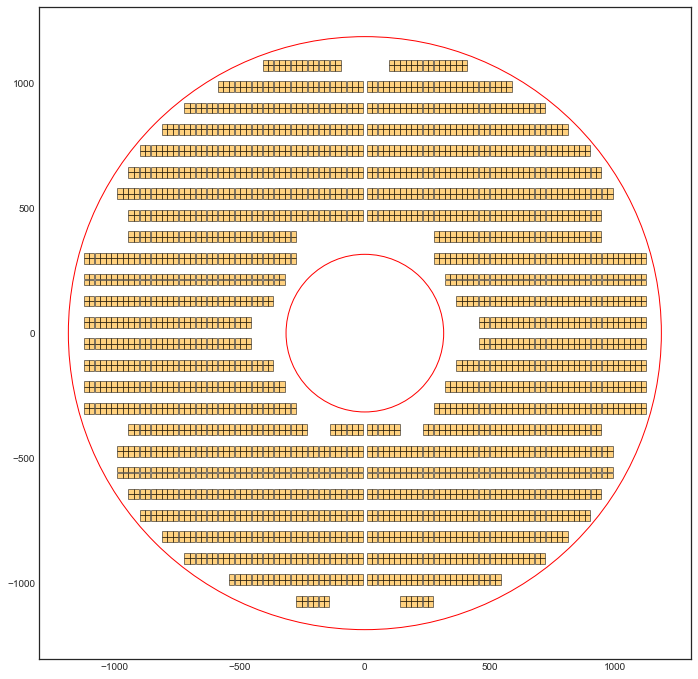

In [6]:
plt.rcParams['figure.figsize'] = [12, 12]

inner = plt.Circle((0, 0), 315,fill=None, edgecolor='r')
outer = plt.Circle((0, 0), 1185,fill=None, edgecolor='r')

plt.gca().add_patch(inner)
plt.gca().add_patch(outer)


for x1,y1 in front_faces:
    m = Sensor(height=21.4,width=21.6,x=x1,y=y1)
    plt.gca().add_patch(m.getPolygon())
    
plt.axis('scaled')
plt.show()

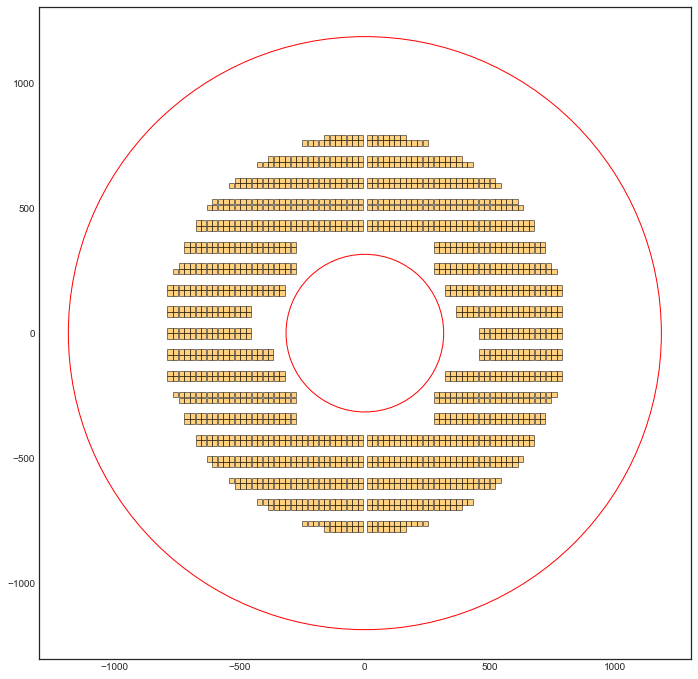

In [7]:
plt.rcParams['figure.figsize'] = [12, 12]

inner = plt.Circle((0, 0), 315,fill=None, edgecolor='r')
outer = plt.Circle((0, 0), 1185,fill=None, edgecolor='r')

plt.gca().add_patch(inner)
plt.gca().add_patch(outer)


for x1,y1 in back_faces:
    m = Sensor(height=21.4,width=21.6,x=x1,y=y1)
    plt.gca().add_patch(m.getPolygon())
    
plt.axis('scaled')
plt.show()

In [9]:
for file in os.listdir('new_yamls_configs'):
    
    if file != '.ipynb_checkpoints' and 'filtered' in file:
        with open(f'new_yamls_configs/{file}') as f:
            database_new = load(f, Loader=Loader)

        disk_new = database_new['new']
        front_faces = disk_new['disk1']['front']
        back_faces = disk_new['disk1']['back']
        back_faces_2 = disk_new['disk2']['back']
        
        print(file,len(front_faces)/4,len(back_faces)/4,len(back_faces_2)/4)

database_new_config_1 filtered 800 888.0 919.0 390.0
database_new_config_2 filtered 800 888.0 919.0 390.0
database_new_config_3 filtered 800 902.0 932.0 393.0
database_new_config_4 filtered 800 868.0 891.0 382.0
database_new_config_5 filtered 800 868.0 891.0 382.0
database_new_config_6 filtered 800 900.0 912.0 389.0
database_new_original filtered 800 902.0 932.0 397.0
